## Kütüphaneleri yükle

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# uyarıları filtremek için
import warnings
warnings.filterwarnings('ignore')

### Veriyi yükle

In [31]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 4C16-0290

 Directory of C:\Users\gulcy\Documents\Bootcamp\day14

20.11.2024  15:38    <DIR>          .
20.11.2024  15:00    <DIR>          ..
20.11.2024  15:00    <DIR>          .ipynb_checkpoints
20.11.2024  15:34             4.063 advertising.csv
20.11.2024  15:38             3.263 Untitled.ipynb
               2 File(s)          7.326 bytes
               3 Dir(s)  380.116.099.072 bytes free


In [33]:
#pandasta excel dosyalarını okumak için xlrd motoru kullanılır
#pip install xlrd

In [41]:
df=pd.read_csv('advertising1-2.csv')

In [43]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [45]:
#df = pd.read_excel('advertising.xls', engine='xlrd')

In [53]:
#içerisindeki sütunlar hakkında bize bilgi verir.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

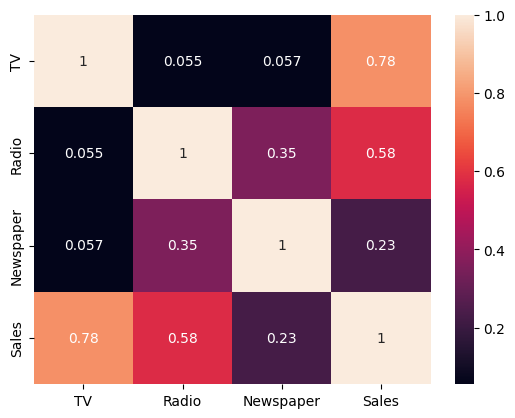

In [55]:
#kolerasyon
sns.heatmap(df.corr(), annot=True)

In [57]:
#Sckit learn kütüphanesi ve gerekli modelülleri yükle
#Veri setini bölmek için
from sklearn.model_selection import train_test_split

#Ölçeklendirme(Veri ön işleme)
from sklearn.preprocessing import StandardScaler

#Model
from sklearn.linear_model import LinearRegression

#Değerlendirme
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
#Özellikleri x ve hedef sütunu belirle y
X = df[['TV', 'Radio', 'Newspaper']]
#X=df.drop('Salaes', axis=1)
y=df['Sales']

In [61]:
#Veri setinin Eğitim ve Test olarak 2ye böl
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2,
                                              random_state=42)

In [63]:
#Modeli oluştur
model=LinearRegression()

In [65]:
#Modeli eğit
model.fit(X_train,y_train)

LinearRegression()

In [69]:
#Eğitilmiş modelde testleri yap
y_pred=model.predict(X_test)

In [71]:
X_test, y_pred

(        TV  Radio  Newspaper
 95   163.3   31.6       52.9
 15   195.4   47.7       52.9
 30   292.9   28.3       43.2
 158   11.7   36.9       45.2
 128  220.3   49.0        3.2
 115   75.1   35.0       52.7
 69   216.8   43.9       27.2
 170   50.0   11.6       18.4
 174  222.4    3.4       13.1
 45   175.1   22.5       31.5
 66    31.5   24.6        2.2
 182   56.2    5.7       29.7
 165  234.5    3.4       84.8
 78     5.4   29.9        9.4
 186  139.5    2.1       26.6
 177  170.2    7.8       35.2
 56     7.3   28.1       41.4
 152  197.6   23.3       14.2
 82    75.3   20.3       32.5
 68   237.4   27.5       11.0
 124  229.5   32.3       74.2
 16    67.8   36.6      114.0
 148   38.0   40.3       11.9
 93   250.9   36.5       72.3
 65    69.0    9.3        0.9
 60    53.5    2.0       21.4
 84   213.5   43.0       33.8
 67   139.3   14.5       10.2
 125   87.2   11.8       25.9
 132    8.4   27.2        2.1
 9    199.8    2.6       21.2
 18    69.2   20.5       18.3
 55   198.

In [73]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64

In [75]:
model_predict_actual=pd.DataFrame({'Test':y_test,
                                  'Tahmin':y_pred})

In [77]:
model_predict_actual

,Test,Tahmin
95,16.9,16.408024
15,22.4,20.889882
30,21.4,21.553843
158,7.3,10.608503
128,24.7,22.112373
115,12.6,13.105592
69,22.3,21.057192
170,8.4,7.461010
174,11.5,13.606346
45,14.9,15.155070


In [79]:
model_predict_actual['Error']=abs(model_predict_actual['Test']-model_predict_actual['Tahmin'])
model_predict_actual

,Test,Tahmin,Error
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,0.153843
158,7.3,10.608503,3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,2.106346
45,14.9,15.155070,0.255070


In [81]:
model_predict_actual.mean()

Test      13.712500
Tahmin    13.810021
Error      1.460757
dtype: float64

In [83]:
#Değerlendirme, 1'e ne kadar yakınsa o kadar iyidir!!!!!
r2=r2_score(y_test,y_pred)
r2 

0.899438024100912

In [85]:
#Hatayı hesapla
print('MSE', mean_squared_error(y_test,y_pred))

MSE 3.1740973539761033


In [87]:
print('RMSE', mean_squared_error(y_test,y_pred)**.5)

RMSE 1.78159966153345


#RMSE=MSE**.5
### Bu formülün katsayılarını ve sabit sayılarını bulmaya çalışıyoruz.
satışlar=Sabit+katsayı1Tv+katsayı2Radio+katsayı3*Newspaper+hata

In [95]:
#TV,Radio,Newspaper
print('Katsayılar', model.coef_)

Katsayılar [0.04472952 0.18919505 0.00276111]


In [97]:
#Sabit Terim
model.intercept_

2.979067338122629

In [99]:
X_test

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [101]:
2.979067338122629+(0.04472952*163.3)+(0.18919505*31.6)+ (0.00276111*52.9)

16.40802425312263

In [103]:
y_pred[0]

16.408024203228628

In [105]:
#İstatistiksel model olarak
import statsmodels.formula.api as sm
model=sm.ols(formula="Sales~TV+Radio+Newspaper",data=df).fit()
coef=model.params
fit=coef[0]+coef[1]*df.TV+coef[2]*df.Radio+coef[3]*df.Newspaper
res=df.Sales-fit
print(fit)
print(res)
print(model.summary())

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64
0      1.576026
1     -1.937855
2     -3.007671
3      0.902170
4     -0.288672
         ...   
195    2.229658
196    1.534688
197    0.014079
198    1.732679
199   -1.773196
Length: 200, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 20 Nov 2024   Prob (F-statistic):           1.58e-96
Time:                        16:28:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:               

In [107]:
#Standartlaştırma
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [111]:
model_lr=LinearRegression()

In [113]:
model_lr.fit(X_train_sc,y_train)

LinearRegression()

In [115]:
y_pred2=model_lr.predict(X_test_sc)
mean_squared_error(y_pred2,y_test)

3.588163345396854

In [117]:
mean_squared_error(y_pred2,y_test)**.5

1.8942447955311514

In [124]:
#Normalleştirme
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_nrm=scaler.fit_transform(X_train)
X_test_nrm=scaler.fit_transform(X_test)
model_lr.fit(X_train_nrm,y_train)
y_pred3=model_lr.predict(X_test_nrm)
mean_squared_error(y_pred3,y_test)

3.140052922577892

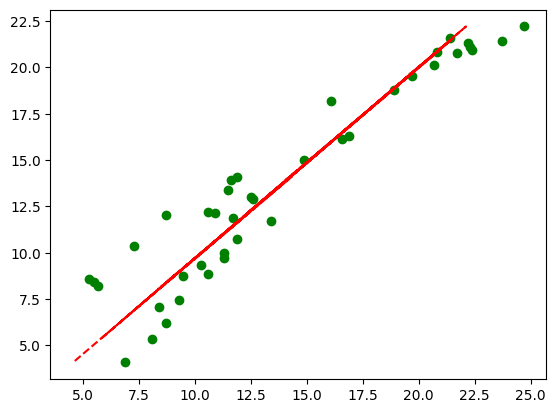

In [126]:
#Linear Regresyon çizgisi ve görselleştirme
plt.plot(y_pred,y_pred3, color='red', linestyle="--")
plt.scatter(y_test,y_pred3, color='green')